In [1]:
# Load libraries
import pandas as pd
import numpy as np
import re
import nltk
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Load dataset
df = pd.read_csv('Amazon_Alexa_Final.csv')
reviews = df['lemma'].tolist()

# Clean reviews
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str) or isinstance(text, bytes):
        text = str(text)
        text = re.sub(r'\s+',' ', text) # remove extra spaces
        text = re.sub(r'\d+', '', text) # remove digits
        text = re.sub(r'[^\w\s]','', text) # remove punctuations
        text = text.lower() # convert to lowercase
        tokens = word_tokenize(text) # tokenize
        tokens = [t for t in tokens if t not in stop_words] # remove stopwords
        return tokens
    else:
        return []
reviews_cleaned = [clean_text(review) for review in reviews]

# Create dictionary
dictionary = corpora.Dictionary(reviews_cleaned)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Create corpus
corpus = [dictionary.doc2bow(review) for review in reviews_cleaned]

# Build LDA model
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Visualize topics
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\karth\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


C:\Users\karth\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>


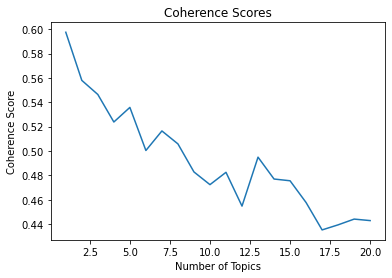

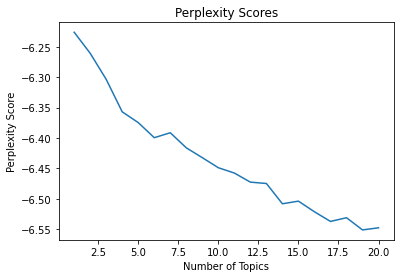

Optimal Number of Topics: 1


In [12]:
# Load libraries
import pandas as pd
import numpy as np
import re
import nltk
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Amazon_Alexa_Final.csv')
reviews = df['lemma'].tolist()

# Clean reviews
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def clean_text(text):
    text = re.sub(r'\s+',' ', text) # remove extra spaces
    text = re.sub(r'\d+', '', text) # remove digits
    text = re.sub(r'[^\w\s]','', text) # remove punctuations
    text = text.lower() # convert to lowercase
    tokens = text.split() # split text into words
    tokens = [t for t in tokens if t not in stop_words] # remove stopwords
    return tokens
reviews_cleaned = [clean_text(review) for review in reviews if isinstance(review, str)]

# Create dictionary
dictionary = corpora.Dictionary(reviews_cleaned)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Create corpus
corpus = [dictionary.doc2bow(review) for review in reviews_cleaned]

# Function to calculate coherence and perplexity scores for different number of topics
def calculate_scores(corpus, dictionary, max_topics):
    coherence_scores = []
    perplexity_scores = []
    for num_topics in range(1, max_topics+1):
        lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
        coherence_model = CoherenceModel(model=lda, texts=reviews_cleaned, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
        perplexity_scores.append(lda.log_perplexity(corpus))
    return coherence_scores, perplexity_scores

# Calculate the coherence scores and perplexity scores for different numbers of topics
coherence_scores, perplexity_scores = calculate_scores(corpus, dictionary, 20)

# Identify the optimal number of topics based on the coherence scores
max_coherence_score = max(coherence_scores)
optimal_num_topics = coherence_scores.index(max_coherence_score) + 1

# Plot the coherence scores and perplexity scores
plt.plot(range(1, 21), coherence_scores)
plt.title('Coherence Scores')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

plt.plot(range(1, 21), perplexity_scores)
plt.title('Perplexity Scores')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.show()

print('Optimal Number of Topics:', optimal_num_topics)